In [1]:
%matplotlib notebook


Bad key "lines.markerfacecolor" on line 11 in
/usr/share/matplotlib/mpl-data/stylelib/classic.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution

Bad key "lines.markeredgecolor" on line 12 in
/usr/share/matplotlib/mpl-data/stylelib/classic.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("data/pseudo_facebook.tsv" , sep='\t')

In [4]:
df.head()

,userid,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
0,2094382,14,19,1999,11,male,266.0,0,0,0,0,0,0,0,0
1,1192601,14,2,1999,11,female,6.0,0,0,0,0,0,0,0,0
2,2083884,14,16,1999,11,male,13.0,0,0,0,0,0,0,0,0
3,1203168,14,25,1999,12,female,93.0,0,0,0,0,0,0,0,0
4,1733186,14,4,1999,12,male,82.0,0,0,0,0,0,0,0,0


# 3rd quantile variable

<IPython.core.display.Javascript object>


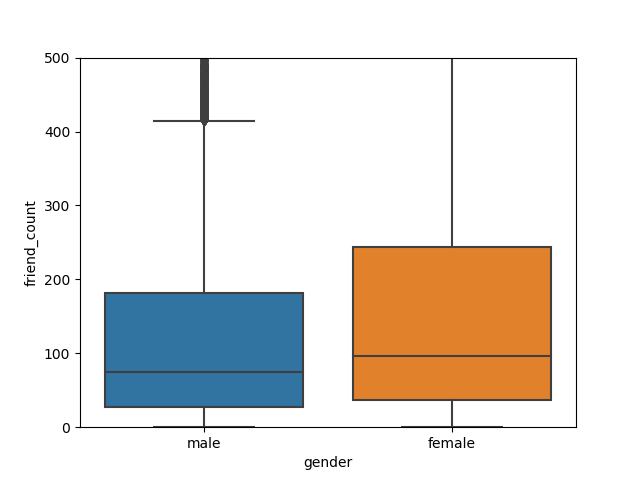

In [5]:
plt.figure()
g = sns.boxplot(x="gender" , y="friend_count" , data=df )
# g.set(xlim=(13 , 70))
g.set(ylim = (0 , 500))
plt.show()

<IPython.core.display.Javascript object>


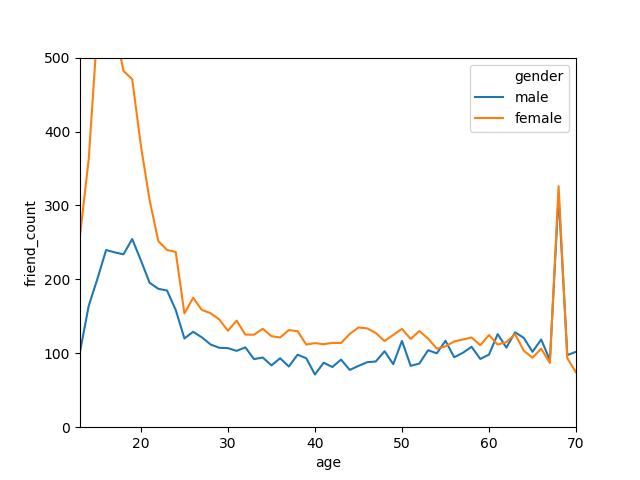

/usr/lib/python3/dist-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


In [6]:
plt.figure()
g = sns.lineplot(x="age" , y="friend_count" , hue="gender",err_style=None , data=df )
g.set(xlim=(13 , 70))
g.set(ylim = (0 , 500))
plt.show()

In [7]:
df.head()

,userid,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
0,2094382,14,19,1999,11,male,266.0,0,0,0,0,0,0,0,0
1,1192601,14,2,1999,11,female,6.0,0,0,0,0,0,0,0,0
2,2083884,14,16,1999,11,male,13.0,0,0,0,0,0,0,0,0
3,1203168,14,25,1999,12,female,93.0,0,0,0,0,0,0,0,0
4,1733186,14,4,1999,12,male,82.0,0,0,0,0,0,0,0,0


In [8]:
age_gender_group = df.groupby(["age" , "gender"])

In [9]:
age_gender_group.friend_count.mean()

age  gender
13   female    259.160622
     male      102.134021
14   female    362.428571
     male      164.145640
15   female    538.681299
                  ...    
111  male      246.500000
112  female    201.200000
     male      594.076923
113  female    278.657143
     male      410.395604
Name: friend_count, Length: 202, dtype: float64

In [10]:
fc_by_age_gender = pd.DataFrame({
    "mean_friend_count" :age_gender_group.friend_count.mean() , 
    "median_friend_count" :age_gender_group.friend_count.median() , 
    "n" :age_gender_group.friend_count.count() , 
    
}) 


In [11]:
fc_by_age_gender

mean_friend_count  median_friend_count     n
age gender                                              
13  female         259.160622                148.0   193
    male           102.134021                 55.0   291
14  female         362.428571                224.0   847
    male           164.145640                 92.5  1078
15  female         538.681299                276.0  1139
...                       ...                  ...   ...
111 male           246.500000                191.5    10
112 female         201.200000                203.0     5
    male           594.076923                 95.0    13
113 female         278.657143                198.0   105
    male           410.395604                223.0    91

[202 rows x 3 columns]

In [12]:
plt.figure()
fc_by_age_gender.mean_friend_count.plot()
plt.show()

<IPython.core.display.Javascript object>

In [15]:
fc_by_age_gender.reset_index(inplace=True)

In [13]:
fc_by_age_gender.head()

mean_friend_count  median_friend_count     n
age gender                                              
13  female         259.160622                148.0   193
    male           102.134021                 55.0   291
14  female         362.428571                224.0   847
    male           164.145640                 92.5  1078
15  female         538.681299                276.0  1139

# Plotting conditional summaries

<IPython.core.display.Javascript object>


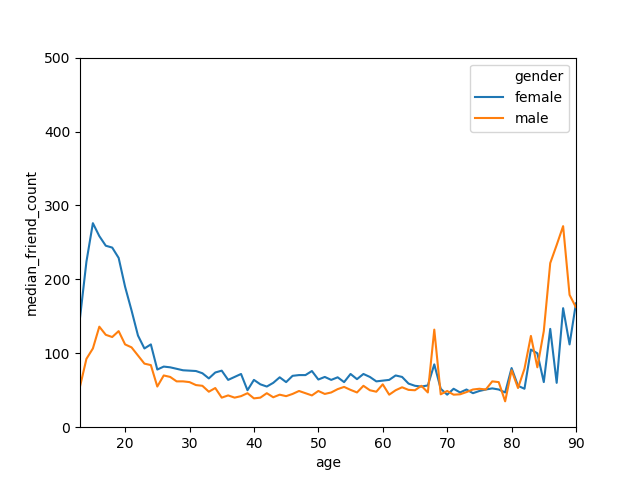

In [16]:
plt.figure()
g = sns.lineplot(x="age" , y="median_friend_count",hue="gender" , data=fc_by_age_gender)
g.set(xlim=(13 , 90))
g.set(ylim=(0,500))
plt.show()

# reshaping data

In [17]:
age_m_fm_median = pd.DataFrame({
    "age" : fc_by_age_gender.age , 
    "female" : fc_by_age_gender.median_friend_count.loc[fc_by_age_gender["gender"] == "female"] , 
    "male"  : fc_by_age_gender.median_friend_count.loc[fc_by_age_gender["gender"] == "male"] ,
}).groupby("age")

In [18]:
age_m_fm_median = age_m_fm_median.median()
age_m_fm_median.reset_index(inplace=True)

In [19]:
age_m_fm_median

,age,female,male
0,13,148.0,55.0
1,14,224.0,92.5
2,15,276.0,106.5
3,16,258.5,136.0
4,17,245.5,125.0
...,...,...,...
96,109,207.5,120.0
97,110,105.0,339.0
98,111,109.0,191.5
99,112,203.0,95.0


# finding the ratio between male and female median friend count

In [20]:
age_m_fm_median["female_ratio"] = age_m_fm_median.female / age_m_fm_median.male
age_m_fm_median["male_ratio"] = age_m_fm_median.male / age_m_fm_median.female

In [21]:
age_m_fm_median.head()

,age,female,male,female_ratio,male_ratio
0,13,148.0,55.0,2.690909,0.371622
1,14,224.0,92.5,2.421622,0.412946
2,15,276.0,106.5,2.591549,0.385870
3,16,258.5,136.0,1.900735,0.526112
4,17,245.5,125.0,1.964000,0.509165


# ratio plot

<IPython.core.display.Javascript object>


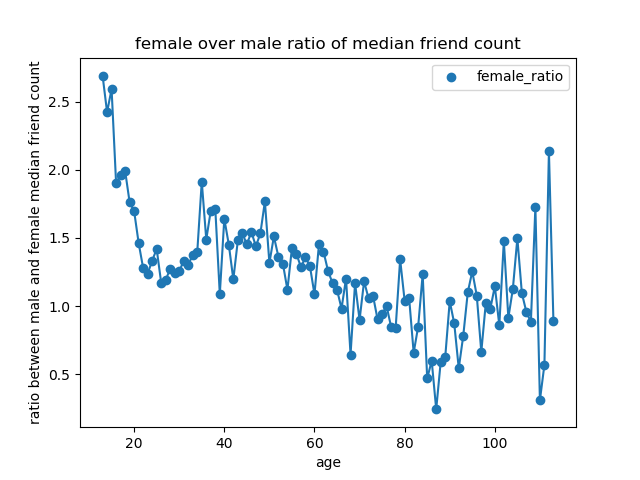

In [22]:
plt.figure()
plt.title("female over male ratio of median friend count")
plt.scatter(x=age_m_fm_median.age , y=age_m_fm_median.female_ratio)
sns.lineplot(x=age_m_fm_median.age , y=age_m_fm_median.female_ratio)
plt.xlabel("age")
plt.ylabel("ratio between male and female median friend count")
plt.show()

<IPython.core.display.Javascript object>


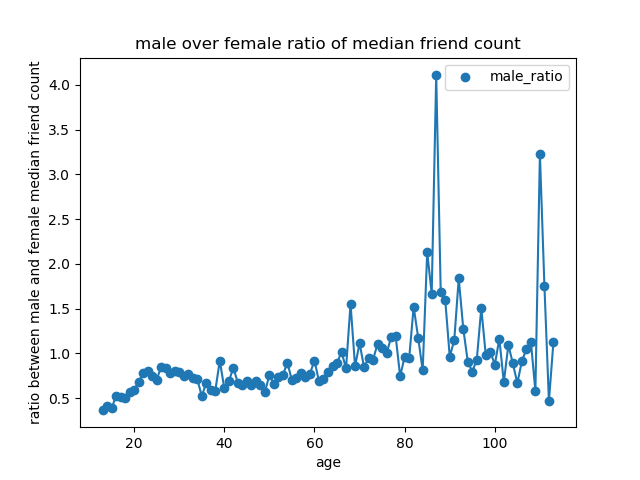

In [24]:
plt.figure()
plt.title("male over female ratio of median friend count")
plt.scatter(x=age_m_fm_median.age , y=age_m_fm_median.male_ratio)
sns.lineplot(x=age_m_fm_median.age , y=age_m_fm_median.male_ratio)
plt.xlabel("age")
plt.ylabel("ratio between male and female median friend count")
plt.show()

<IPython.core.display.Javascript object>


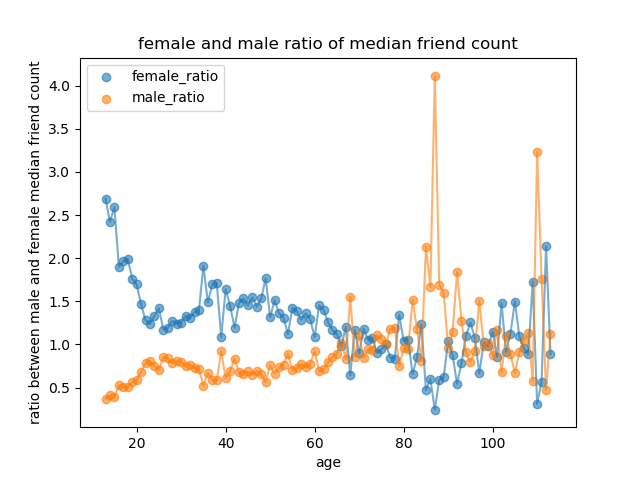

In [23]:
plt.figure()
plt.title("female and male ratio of median friend count")
plt.scatter(x=age_m_fm_median.age , y=age_m_fm_median.female_ratio , alpha=0.6)
sns.lineplot(x=age_m_fm_median.age , y=age_m_fm_median.female_ratio , alpha=0.6)
# 
plt.scatter(x=age_m_fm_median.age , y=age_m_fm_median.male_ratio , alpha=0.6)
sns.lineplot(x=age_m_fm_median.age , y=age_m_fm_median.male_ratio , alpha=0.6)
plt.xlabel("age")
plt.ylabel("ratio between male and female median friend count")
plt.show()

# Third quantive vairable (creating the variable year user joind the facebook )

In [25]:
df.head()

,userid,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
0,2094382,14,19,1999,11,male,266.0,0,0,0,0,0,0,0,0
1,1192601,14,2,1999,11,female,6.0,0,0,0,0,0,0,0,0
2,2083884,14,16,1999,11,male,13.0,0,0,0,0,0,0,0,0
3,1203168,14,25,1999,12,female,93.0,0,0,0,0,0,0,0,0
4,1733186,14,4,1999,12,male,82.0,0,0,0,0,0,0,0,0


In [26]:
df["year_joined"] = (2014 - (df.tenure / 365)).astype(np.float16)

In [27]:
df.year_joined.dtype

dtype('float16')

# Cut a variable

In [28]:
df.year_joined.describe()

count    99001.0
mean         NaN
std          NaN
min       2005.0
25%       2012.0
50%       2013.0
75%       2013.0
max       2014.0
Name: year_joined, dtype: float64

In [29]:
df.year_joined.value_counts()

2013.0    45183
2014.0    19143
2012.0    18779
2011.0     6547
2010.0     5215
2009.0     2998
2008.0     1020
2007.0      104
2006.0        7
2005.0        5
Name: year_joined, dtype: int64

In [30]:
# bins = pd.IntervalIndex.from_tuples([(2004, 2009) , (2011, 2012) ,(2012, 2014) ])
df_cuts = pd.cut(df.year_joined , bins=[2004 , 2009 , 2011 ,2012, 2014])

In [31]:
df_cuts.value_counts()

(2012, 2014]    64326
(2011, 2012]    18779
(2009, 2011]    11762
(2004, 2009]     4134
Name: year_joined, dtype: int64

## plotting the bucket

<IPython.core.display.Javascript object>


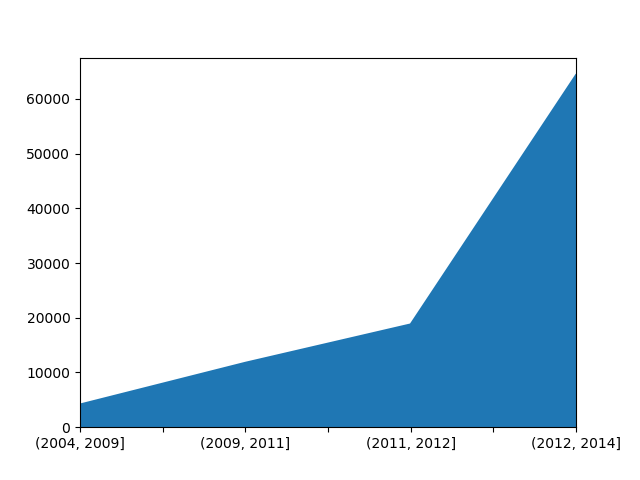

In [32]:
plt.figure()
df_cuts.value_counts(sort=False).plot(kind="area")
plt.show()

In [33]:
df["df_cuts"] = df_cuts

In [34]:
df.head()

,userid,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received,year_joined,df_cuts
0,2094382,14,19,1999,11,male,266.0,0,0,0,0,0,0,0,0,2013.0,"(2012, 2014]"
1,1192601,14,2,1999,11,female,6.0,0,0,0,0,0,0,0,0,2014.0,"(2012, 2014]"
2,2083884,14,16,1999,11,male,13.0,0,0,0,0,0,0,0,0,2014.0,"(2012, 2014]"
3,1203168,14,25,1999,12,female,93.0,0,0,0,0,0,0,0,0,2014.0,"(2012, 2014]"
4,1733186,14,4,1999,12,male,82.0,0,0,0,0,0,0,0,0,2014.0,"(2012, 2014]"


In [35]:
df.head()

,userid,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received,year_joined,df_cuts
0,2094382,14,19,1999,11,male,266.0,0,0,0,0,0,0,0,0,2013.0,"(2012, 2014]"
1,1192601,14,2,1999,11,female,6.0,0,0,0,0,0,0,0,0,2014.0,"(2012, 2014]"
2,2083884,14,16,1999,11,male,13.0,0,0,0,0,0,0,0,0,2014.0,"(2012, 2014]"
3,1203168,14,25,1999,12,female,93.0,0,0,0,0,0,0,0,0,2014.0,"(2012, 2014]"
4,1733186,14,4,1999,12,male,82.0,0,0,0,0,0,0,0,0,2014.0,"(2012, 2014]"


<IPython.core.display.Javascript object>


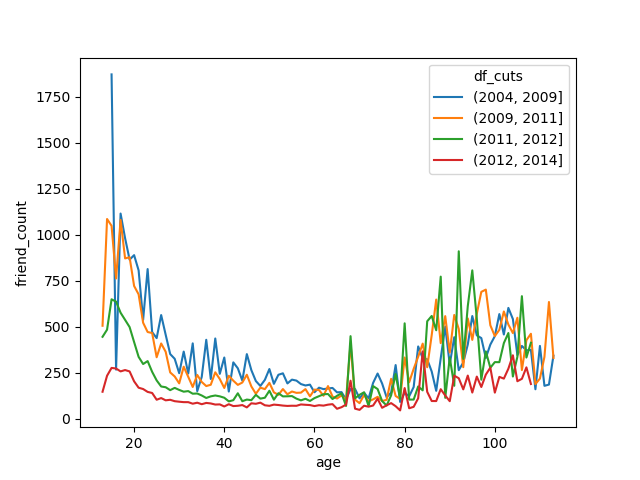

/usr/lib/python3/dist-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


In [36]:
plt.figure()
sns.lineplot(x="age" , y="friend_count", hue="df_cuts" ,
             data=df , err_style=None)
plt.show()

# Plot the grand mean

In [37]:
fc_men_med = pd.DataFrame({
    "mean" : df.groupby("age").mean()["friend_count"] , 
    "median" : df.groupby("age").median()["friend_count"] , 
})

In [38]:
fc_men_med.reset_index(inplace=True)


<IPython.core.display.Javascript object>


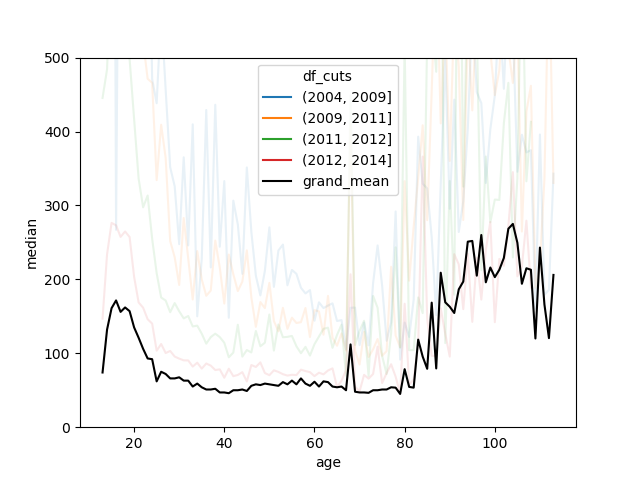

/usr/lib/python3/dist-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


In [39]:
plt.figure()
sns.lineplot(x="age" , y="friend_count", hue="df_cuts" ,
             data=df , err_style=None , alpha=0.1)
sns.lineplot(x=fc_men_med["age"] , y=fc_men_med["median"],
             data=df ,color="black",label="grand_mean")
plt.ylim(ymin=0 , ymax=500)
plt.show()

# Friending Rate

In [40]:
df = df.loc[df["tenure"] >=1]

In [41]:
friending_rate= df.apply(lambda x: x["friend_count"] / x["tenure"] , axis=1)

In [42]:
friending_rate.mean()

0.6096090257045998

In [43]:
friending_rate.median()

0.2204861111111111

In [ ]:
friending_rate.describe()

# Friendship initiated

In [44]:
df.head()

,userid,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received,year_joined,df_cuts
0,2094382,14,19,1999,11,male,266.0,0,0,0,0,0,0,0,0,2013.0,"(2012, 2014]"
1,1192601,14,2,1999,11,female,6.0,0,0,0,0,0,0,0,0,2014.0,"(2012, 2014]"
2,2083884,14,16,1999,11,male,13.0,0,0,0,0,0,0,0,0,2014.0,"(2012, 2014]"
3,1203168,14,25,1999,12,female,93.0,0,0,0,0,0,0,0,0,2014.0,"(2012, 2014]"
4,1733186,14,4,1999,12,male,82.0,0,0,0,0,0,0,0,0,2014.0,"(2012, 2014]"


In [45]:
df["fr_in_by_tenure"] = df.apply(lambda x : (x.friendships_initiated / x.tenure) , axis=1)

/usr/lib/python3/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [46]:
df.head()

,userid,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received,year_joined,df_cuts,fr_in_by_tenure
0,2094382,14,19,1999,11,male,266.0,0,0,0,0,0,0,0,0,2013.0,"(2012, 2014]",0.0
1,1192601,14,2,1999,11,female,6.0,0,0,0,0,0,0,0,0,2014.0,"(2012, 2014]",0.0
2,2083884,14,16,1999,11,male,13.0,0,0,0,0,0,0,0,0,2014.0,"(2012, 2014]",0.0
3,1203168,14,25,1999,12,female,93.0,0,0,0,0,0,0,0,0,2014.0,"(2012, 2014]",0.0
4,1733186,14,4,1999,12,male,82.0,0,0,0,0,0,0,0,0,2014.0,"(2012, 2014]",0.0


In [47]:
plt.figure()
g = sns.lineplot(x="tenure" , y="fr_in_by_tenure" , data=df , hue="df_cuts")
g.set(ylim=(0,20))
# g.set(xlim=(0,1))
plt.show()

<IPython.core.display.Javascript object>

/usr/lib/python3/dist-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


# Bias variance Trade off

In [48]:
df["tenure_b_7"] = df.apply(lambda x : 7 * round(x.tenure / 7) , axis=1)

/usr/lib/python3/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [49]:
df["tenure_b_30"] = df.apply(lambda x : 30 * round(x.tenure / 30) , axis=1)

/usr/lib/python3/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [50]:
df["tenure_b_90"] = df.apply(lambda x : 90 * round(x.tenure / 90) , axis=1)

/usr/lib/python3/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [70]:
tenure_smooth_group = df.groupby("tenure")


In [71]:
ti , ti_7, ti_30 , ti_90 = tenure_smooth_group.mean()["fr_in_by_tenure"],\
tenure_smooth_group.mean()["tenure_b_7"],tenure_smooth_group.mean()["tenure_b_30"],\
tenure_smooth_group.mean()["tenure_b_90"]


In [80]:
tenure_smooth_group = pd.DataFrame({
    "tenure_inti" :ti , 
    "tenure/7" :ti_7 , 
    "tenure/30" :ti_30 ,  
    "tenure/90" :ti_90 , 
})

In [84]:
tenure_smooth_group.reset_index(inplace=True)

In [86]:
tenure_smooth_group.head()

,tenure,tenure_inti,tenure/7,tenure/30,tenure/90
0,1.0,4.233333,0.0,0.0,0.0
1,2.0,9.548611,0.0,0.0,0.0
2,3.0,3.966245,0.0,0.0,0.0
3,4.0,3.267442,7.0,0.0,0.0
4,5.0,4.032609,7.0,0.0,0.0


In [88]:
df = df.merge(tenure_smooth_group , on="tenure")

In [89]:
df.head()

,tenure,userid,age,dob_day,dob_year,dob_month,gender,friend_count,friendships_initiated,likes,...,year_joined,df_cuts,fr_in_by_tenure,tenure_b_7,tenure_b_30,tenure_b_90,tenure_inti,tenure/7,tenure/30,tenure/90
0,266.0,2094382,14,19,1999,11,male,0,0,0,...,2013.0,"(2012, 2014]",0.0,266,270,270,0.261405,266.0,270.0,270.0
1,266.0,1255528,14,20,1999,2,male,0,0,0,...,2013.0,"(2012, 2014]",0.0,266,270,270,0.261405,266.0,270.0,270.0
2,266.0,1725783,25,26,1988,11,male,0,0,0,...,2013.0,"(2012, 2014]",0.0,266,270,270,0.261405,266.0,270.0,270.0
3,266.0,1726829,26,15,1987,10,female,1,0,0,...,2013.0,"(2012, 2014]",0.0,266,270,270,0.261405,266.0,270.0,270.0
4,266.0,2120914,30,2,1983,5,male,1,0,0,...,2013.0,"(2012, 2014]",0.0,266,270,270,0.261405,266.0,270.0,270.0


<IPython.core.display.Javascript object>


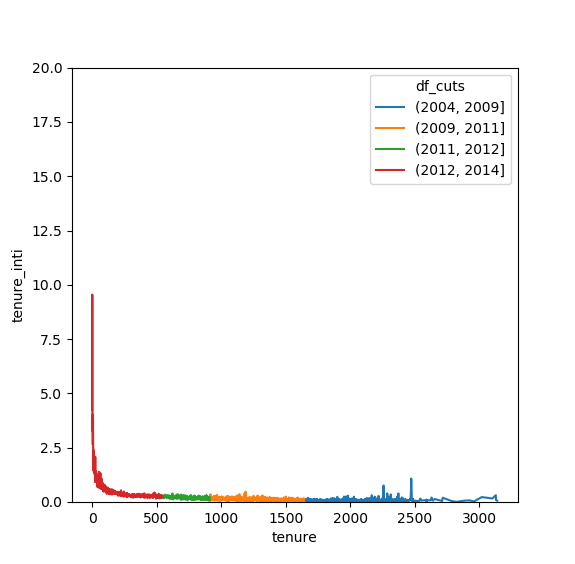

/usr/lib/python3/dist-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


In [90]:
plt.figure()
g = sns.lineplot(x="tenure" , y="tenure_inti" , data=df , hue="df_cuts")
g.set(ylim=(0,20))

plt.show()

<IPython.core.display.Javascript object>


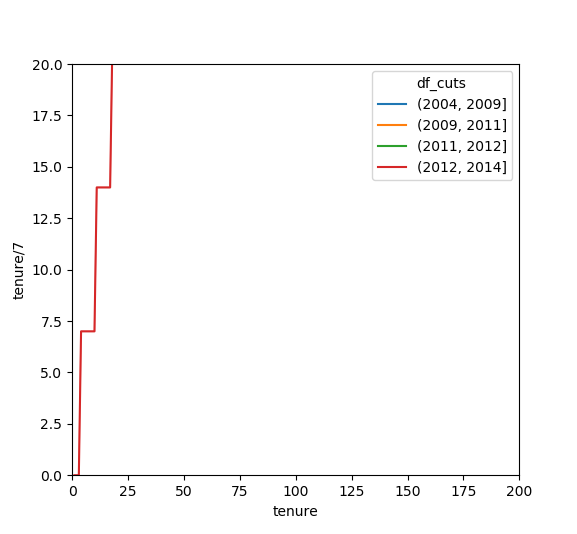

/usr/lib/python3/dist-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


In [94]:
plt.figure()
g = sns.lineplot(x="tenure" , y="tenure/7" , data=df , hue="df_cuts")
g.set(ylim=(0,20))
g.set(xlim=(0,200))

plt.show()

<IPython.core.display.Javascript object>


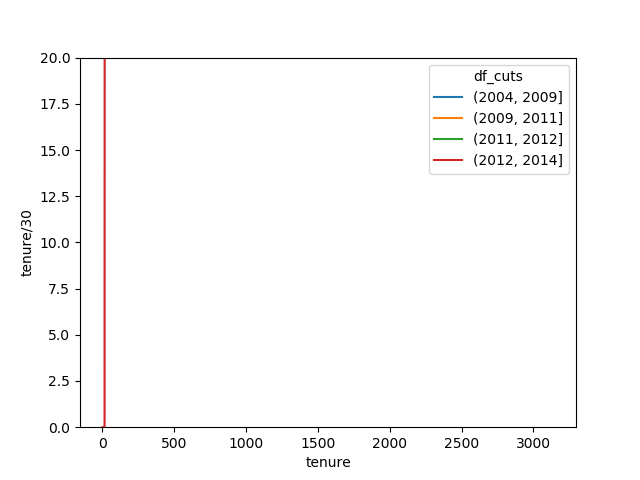

/usr/lib/python3/dist-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


In [92]:
plt.figure()
g = sns.lineplot(x="tenure" , y="tenure/30" , data=df , hue="df_cuts")
g.set(ylim=(0,20))

plt.show()

<IPython.core.display.Javascript object>


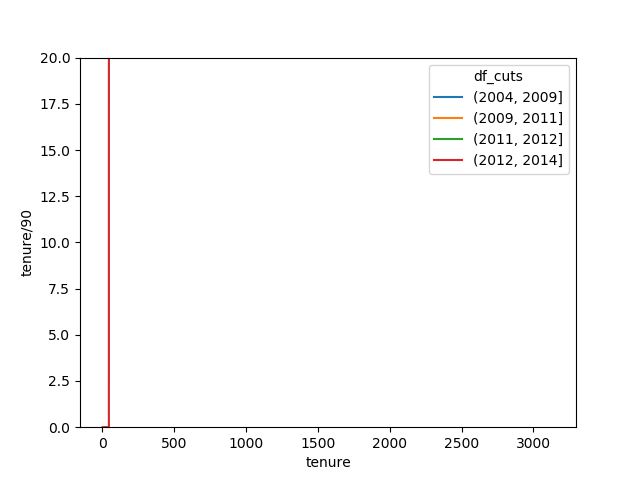

/usr/lib/python3/dist-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


In [93]:
plt.figure()
g = sns.lineplot(x="tenure" , y="tenure/90" , data=df , hue="df_cuts")
g.set(ylim=(0,20))

plt.show()

# Yogurt Dataset

In [95]:
df = pd.read_csv("data/yogurt.csv")

In [96]:
df

,obs,id,time,strawberry,blueberry,pina.colada,plain,mixed.berry,price
0,1,2100081,9678,0,0,0,0,1,58.96
1,2,2100081,9697,0,0,0,0,1,58.96
2,3,2100081,9825,0,0,0,0,1,65.04
3,4,2100081,9999,0,0,0,0,1,65.04
4,5,2100081,10015,1,0,1,0,1,48.96
...,...,...,...,...,...,...,...,...,...
2375,2736,2169896,10207,0,0,0,1,0,39.04
2376,2737,2169896,10315,0,0,0,1,0,68.96
2377,2738,2169896,10318,0,0,0,1,0,68.96
2378,2742,2170639,9809,0,0,0,1,0,65.04


# Histogram revisted

<IPython.core.display.Javascript object>


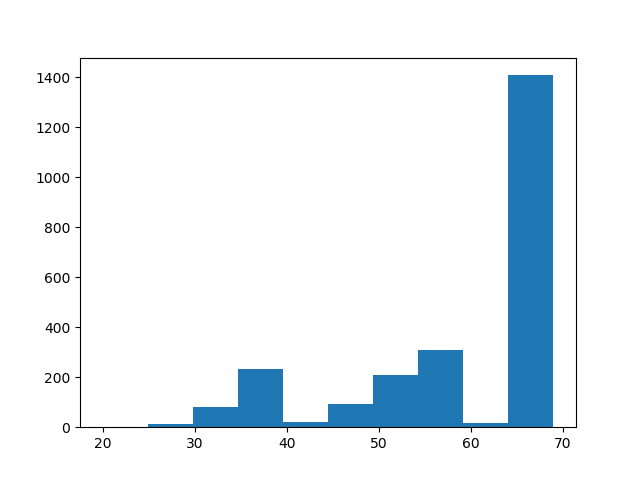

In [100]:
plt.figure()
plt.hist(df.price)
plt.show()

<IPython.core.display.Javascript object>


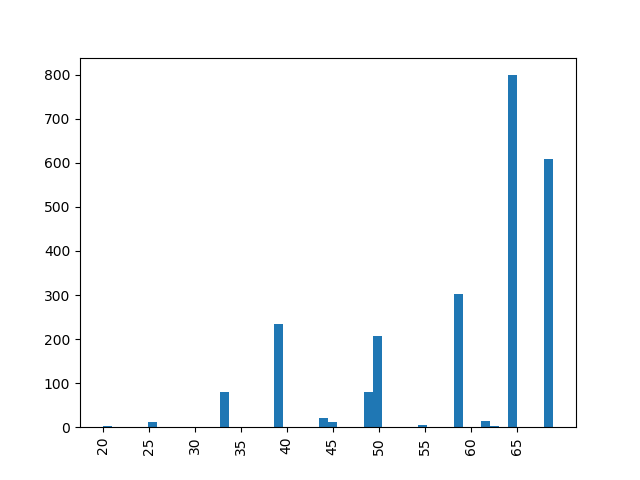

In [103]:
plt.figure()
plt.hist(df.price , bins=50)
plt.xticks(np.arange(df.price.min() , df.price.max() , step=5) , rotation="vertical")

plt.show()

<IPython.core.display.Javascript object>


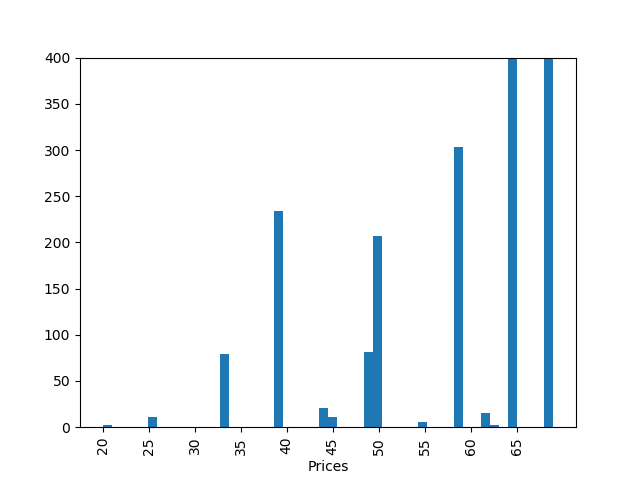

In [107]:
plt.figure()
plt.hist(df.price , bins=50)
plt.xticks(np.arange(df.price.min() , df.price.max() , step=5) , rotation="vertical")
plt.ylim(ymin=0 , ymax=400)
plt.xlabel("Prices")
plt.show()

<IPython.core.display.Javascript object>


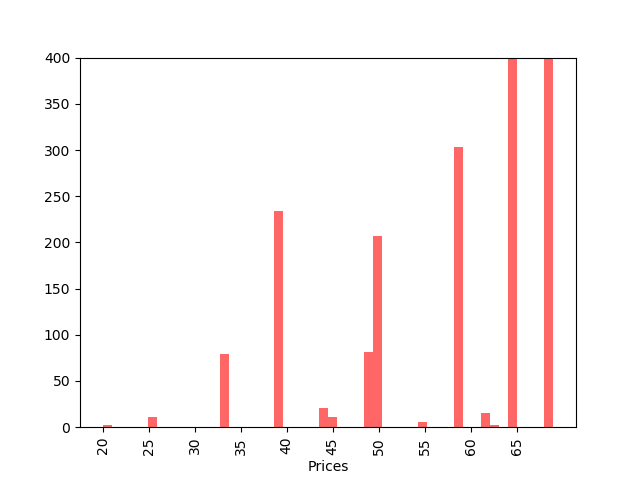

In [110]:
plt.figure()
plt.hist(df.price , bins=50 ,color="red" , alpha=0.6)
plt.xticks(np.arange(df.price.min() , df.price.max() , step=5) , rotation="vertical")
plt.ylim(ymin=0 , ymax=400)
plt.xlabel("Prices")
plt.show()

# no.of purchases

<IPython.core.display.Javascript object>


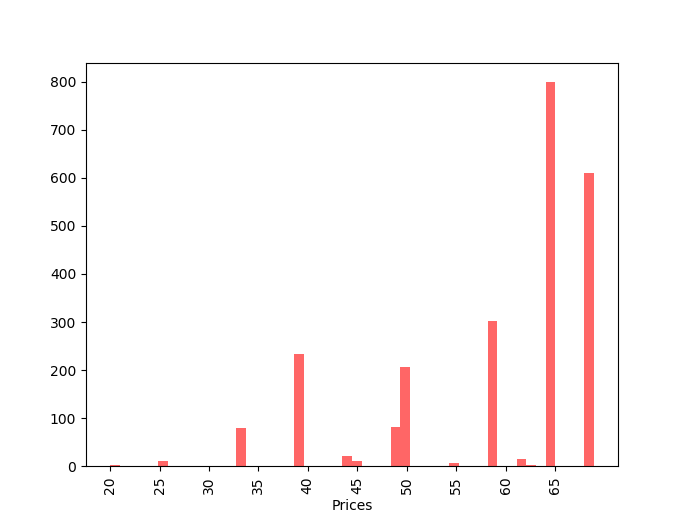

In [111]:
plt.figure()
plt.hist(df.price , bins=50 ,color="red" , alpha=0.6)
plt.xticks(np.arange(df.price.min() , df.price.max() , step=5) , rotation="vertical")
# plt.ylim(ymin=0 , ymax=400)
plt.xlabel("Prices")
plt.show()

In [112]:
df.price.describe()

count    2380.000000
mean       59.250891
std        10.913256
min        20.000000
25%        50.000000
50%        65.040000
75%        68.960000
max        68.960000
Name: price, dtype: float64

In [119]:
df.price.unique()

array([58.96, 65.04, 48.96, 68.96, 39.04, 24.96, 50.  , 45.04, 33.04,
       44.  , 33.36, 55.04, 62.  , 20.  , 49.6 , 49.52, 33.28, 63.04,
       33.2 , 33.52])

In [120]:
df.price.value_counts()

65.04    799
68.96    609
58.96    303
39.04    234
50.00    205
48.96     81
33.04     54
33.36     22
44.00     21
62.00     15
45.04     11
24.96     11
55.04      6
63.04      2
20.00      2
33.20      1
49.60      1
49.52      1
33.52      1
33.28      1
Name: price, dtype: int64

In [121]:
df.head()

,obs,id,time,strawberry,blueberry,pina.colada,plain,mixed.berry,price
0,1,2100081,9678,0,0,0,0,1,58.96
1,2,2100081,9697,0,0,0,0,1,58.96
2,3,2100081,9825,0,0,0,0,1,65.04
3,4,2100081,9999,0,0,0,0,1,65.04
4,5,2100081,10015,1,0,1,0,1,48.96


In [122]:
# get the total purchases for each id

In [169]:
df["all_purchaes"] = df.apply(lambda x: int(x["strawberry"] +x["blueberry"] +x["pina.colada"] + x["plain"] + x["mixed.berry"]) , axis=1)

In [170]:
df.tail()

,obs,id,time,strawberry,blueberry,pina.colada,plain,mixed.berry,price,all_purchaes
2375,2736,2169896,10207,0,0,0,1,0,39.04,1
2376,2737,2169896,10315,0,0,0,1,0,68.96,1
2377,2738,2169896,10318,0,0,0,1,0,68.96,1
2378,2742,2170639,9809,0,0,0,1,0,65.04,1
2379,2743,2170639,10010,0,0,0,1,0,65.04,1


# Prices over time

/usr/lib/python3/dist-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


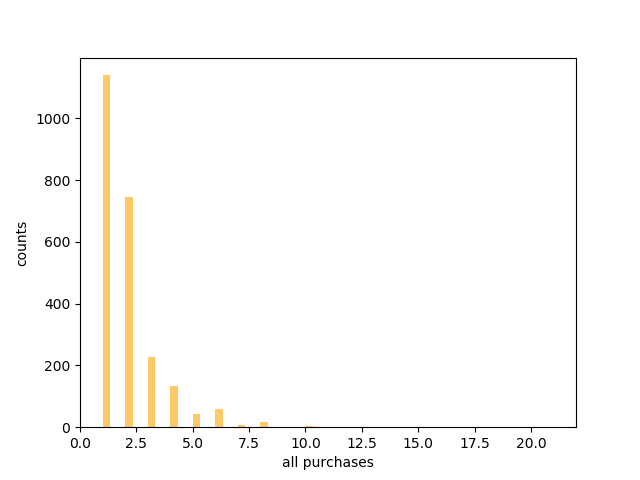

In [128]:
plt.figure()
plt.hist(df.all_purchaes , bins=60 , alpha=0.6 , color="orange")
plt.xlabel("all purchases")
plt.ylabel("counts")
plt.show()

/usr/lib/python3/dist-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


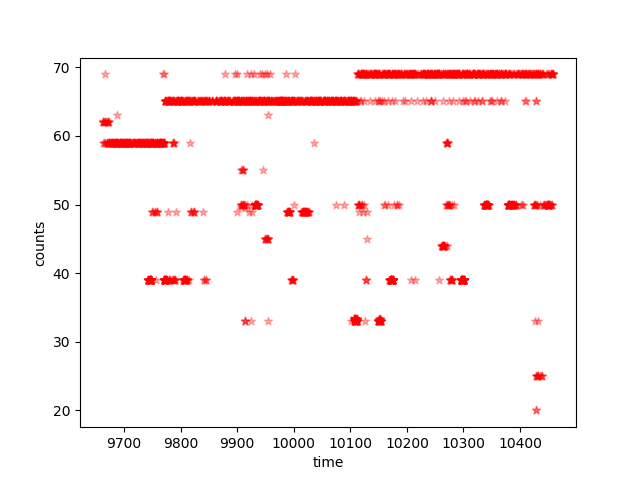

In [135]:
plt.figure()
plt.scatter(x = df.time , y=df.price, marker='*',  alpha=0.3 , color="red")
plt.xlabel("time")
plt.ylabel("counts")
plt.show()

# sampling observation

/usr/lib/python3/dist-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


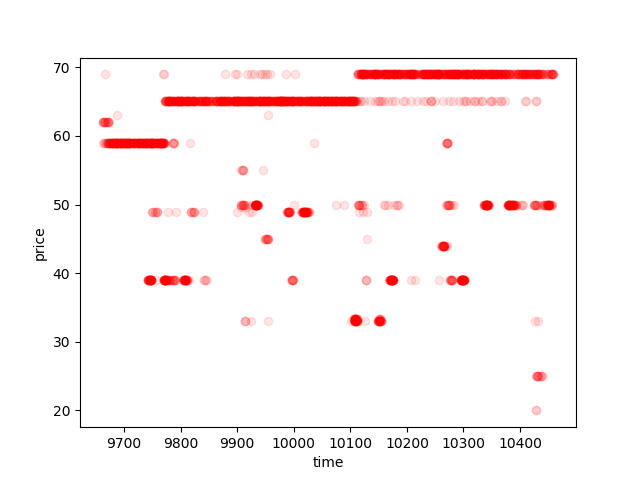

In [145]:
plt.figure()
plt.scatter(x = df.time , y=df.price, marker='o',  alpha=0.1 , color="red")
plt.xlabel("time")
plt.ylabel("price")
plt.show()

# Looking at samples of household

In [137]:
sample_df = df.sample(16)

In [139]:
sample_df.id

2022    2149500
1799    2142885
1519    2132290
1496    2132290
1402    2130583
2015    2149500
98      2101790
2184    2155929
2270    2162545
1655    2134676
1352    2130351
1685    2136531
1838    2143875
205     2104547
962     2123554
2122    2153015
Name: id, dtype: int64

/usr/lib/python3/dist-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


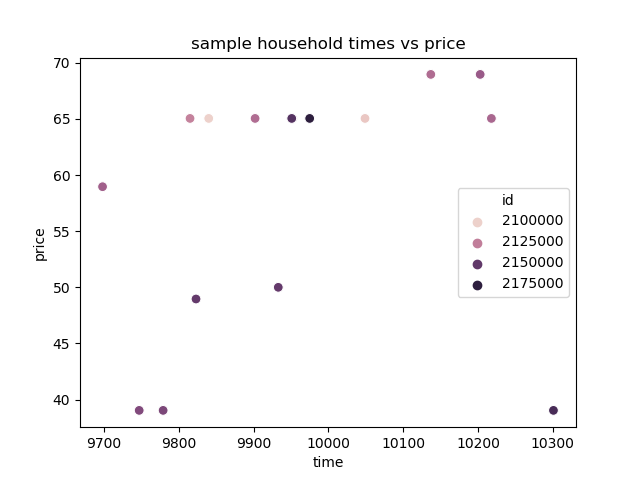

In [144]:
plt.figure()
plt.title("sample household times vs price")
sns.scatterplot(x = sample_df.time , y=sample_df.price, hue=sample_df.id, marker='o',  s=50 , color="red")
plt.xlabel("time")
plt.ylabel("price")
plt.show()

In [153]:
mre_1_purc_df = df.loc[df["all_purchaes" ]> 1]

In [154]:
mre_1_purc_df

,obs,id,time,strawberry,blueberry,pina.colada,plain,mixed.berry,price,all_purchaes
4,5,2100081,10015,1,0,1,0,1,48.96,3.0
5,6,2100081,10029,1,0,2,0,1,65.04,4.0
10,11,2100081,10097,0,0,0,0,3,65.04,3.0
12,13,2100081,10119,0,0,0,0,2,68.96,2.0
13,14,2100081,10126,0,0,0,0,2,68.96,2.0
...,...,...,...,...,...,...,...,...,...,...
2363,2724,2169250,9709,1,0,0,0,1,58.96,2.0
2365,2726,2169268,10253,2,0,0,0,0,68.96,2.0
2366,2727,2169268,10284,0,0,3,0,0,68.96,3.0
2369,2730,2169268,10425,0,2,0,0,0,68.96,2.0


/usr/lib/python3/dist-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


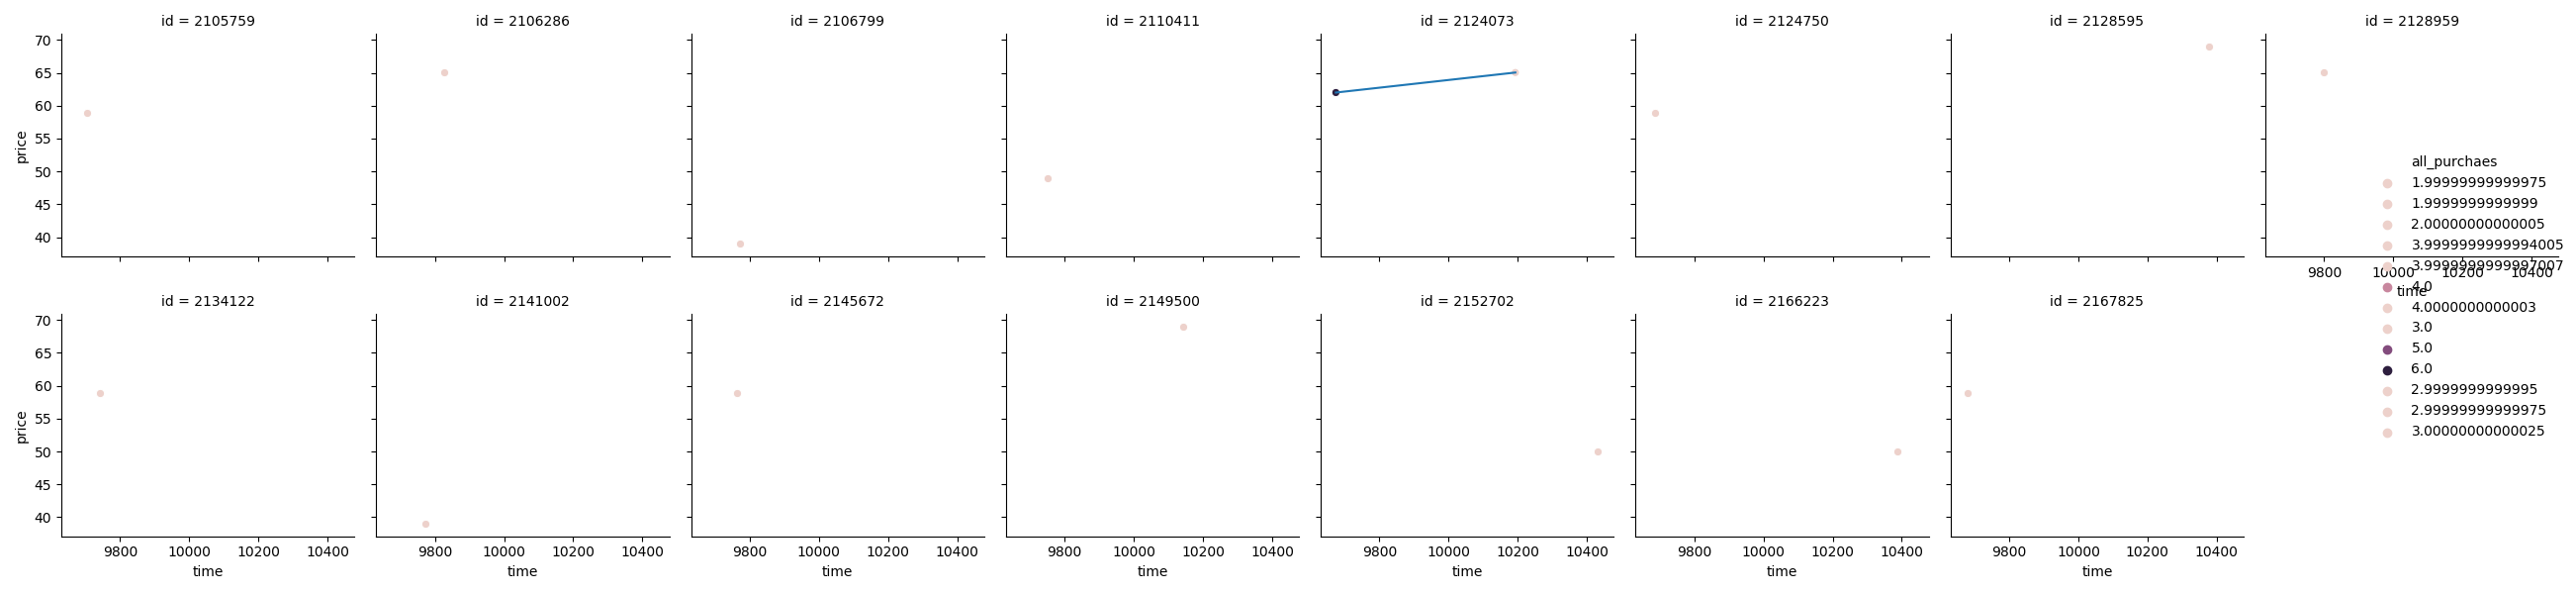

In [177]:
sample_df = mre_1_purc_df.sample(16 , random_state=3)
g = sns.FacetGrid(col="id" ,col_wrap=8, data=sample_df)
g.map(sns.scatterplot ,"time" , "price" , "all_purchaes",).add_legend()
g.map(sns.lineplot , "time" , "price")

plt.show()

# scatter plot matrices

In [180]:
df = pd.read_csv("data/pseudo_facebook.tsv" , sep="\t")
df.head()

,userid,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
0,2094382,14,19,1999,11,male,266.0,0,0,0,0,0,0,0,0
1,1192601,14,2,1999,11,female,6.0,0,0,0,0,0,0,0,0
2,2083884,14,16,1999,11,male,13.0,0,0,0,0,0,0,0,0
3,1203168,14,25,1999,12,female,93.0,0,0,0,0,0,0,0,0
4,1733186,14,4,1999,12,male,82.0,0,0,0,0,0,0,0,0


/usr/lib/python3/dist-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


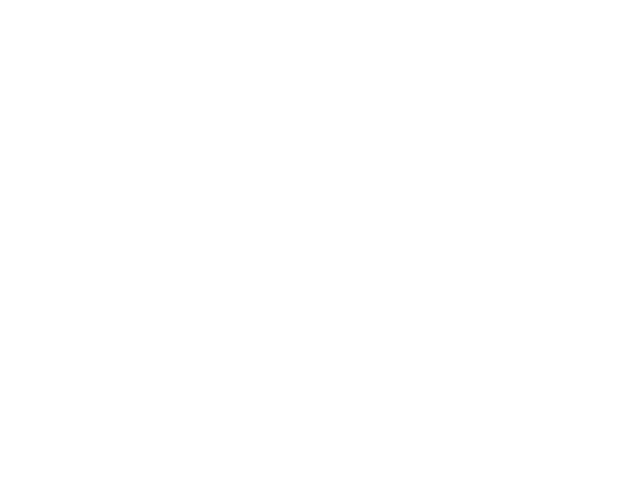

<IPython.core.display.Javascript object>


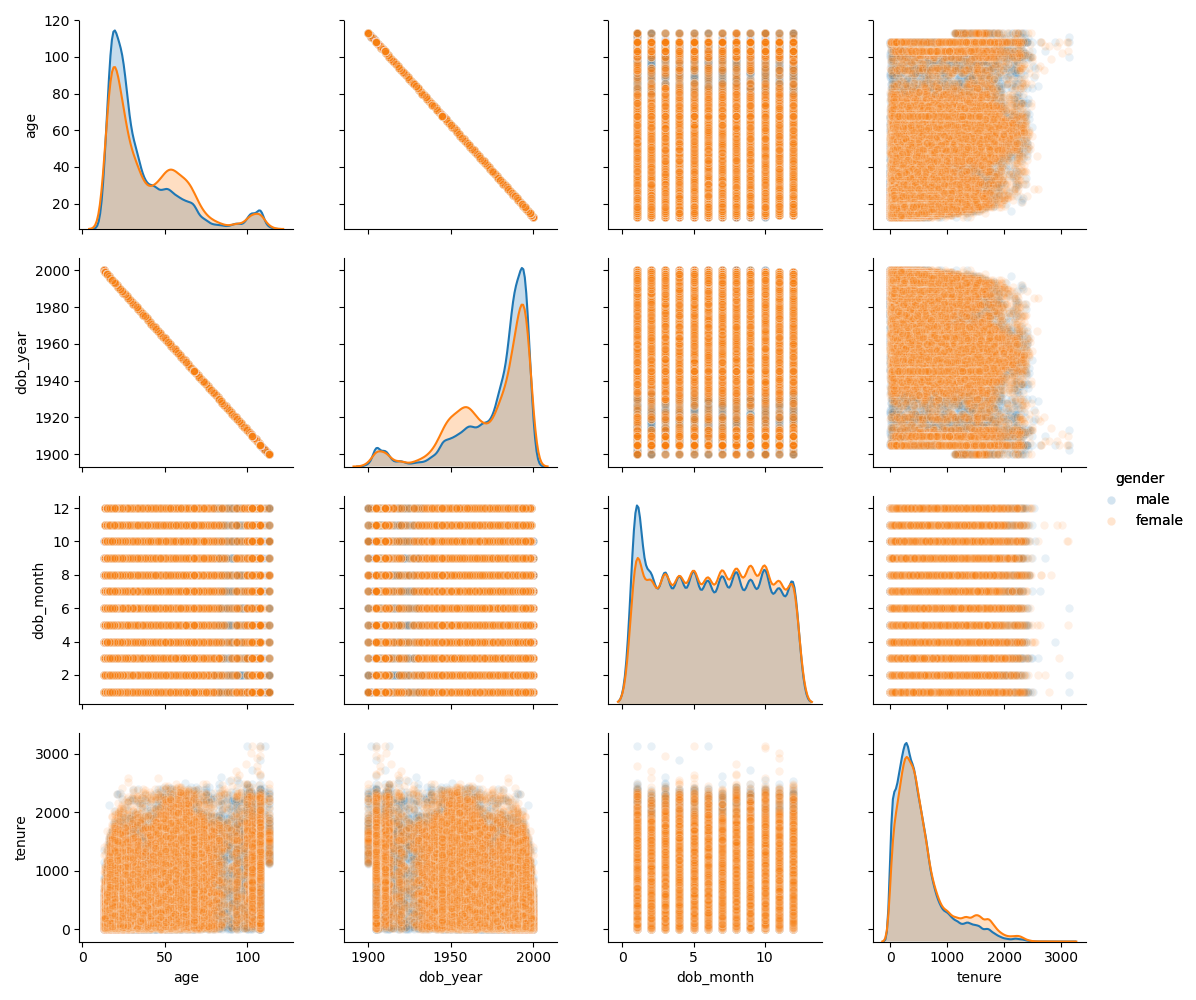

/usr/lib/python3/dist-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/usr/local/lib/python3.7/dist-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/usr/local/lib/python3.7/dist-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


In [187]:
plt.figure()
g = sns.pairplot(data=df , vars=["age" , "dob_year" , "dob_month"  , "tenure"] , hue="gender", plot_kws={'alpha':0.1})
g.add_legend()
plt.show()

# Gene Expression Data